# Video Games Sales Exploration
## by Birinder Singh

## Intro to the Dataset

> This document explores video game sales data collected till December 2016 for approx 6900 game titles.

In [8]:
# Importing necessary Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# Importing the DataSet 
game_sales = pd.read_csv('vgsales_extend.csv')

In [10]:
# high-level overview of data shape and composition
print(game_sales.shape)
print(game_sales.dtypes)
print(game_sales.head(10))
game_sales.info()

(16719, 16)
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object
                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS 

# Preliminary Cleaning

In [11]:
# Since In the kaggle dataset it was mentioned that there are approx 40% missing values,
#so I guess better drop them all.
game_sales_clean = game_sales.dropna()

In [12]:
# Converting Year of release column from float to string
game_sales_clean['Year_of_Release']=game_sales_clean['Year_of_Release'].astype('str')

<ipython-input-12-d9ec42761431>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_sales_clean['Year_of_Release']=game_sales_clean['Year_of_Release'].astype('str')


In [13]:
# Eliminating the decimals from years to make it look clean.
game_sales_clean['Year_of_Release']=game_sales_clean['Year_of_Release'].str[:-2]

<ipython-input-13-dbb16f40f3a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_sales_clean['Year_of_Release']=game_sales_clean['Year_of_Release'].str[:-2]


In [14]:
# Saving file as game_sales.csv just to avoid any risks.
game_sales_clean.to_csv('game_sales.csv',index=False)

In [15]:
# Reading the file again to further work on it. 
game_sales = pd.read_csv('game_sales.csv')

In [16]:
# If we check all the distinct values in Rating section
# Only T,E,M and E10+ has bulky values but K-A,RP,AO has only 1 title.
# So considering it as an outlier, I eliminated them all.
game_sales_sub = game_sales.loc[game_sales['Rating'].isin(['T','E','M','E10+'])]

In [187]:
# While preparing Facetgrid I realized there were no E10+ rating for DC games.
# The reason to pay attention to this was because of the above fact, the facetgrid was
# unable to display E10+ ratings for all console. So rather than eliminating it permanently.
# I made a sub database for it.
game_sales_sub_1 = game_sales_sub[game_sales_sub.Platform != "DC"]

In [18]:
# There were many values for NA_Sales,JP_Sales,EU_Sales and other region which were 0.
# Due to which log transformation was difficult.
# So I actually discarded all those entries where these were 0.
game_sales_sub_2 = game_sales_sub[game_sales_sub.NA_Sales!=0]
game_sales_sub_3 = game_sales_sub[game_sales_sub.EU_Sales!=0]
game_sales_sub_4 = game_sales_sub[game_sales_sub.JP_Sales!=0]
game_sales_sub_5 = game_sales_sub[game_sales_sub.Other_Sales!=0]

In [94]:
# There is a plot numbered 9 under Univariate exploration,
# where I have plotted game titles count based of generations.
# Since I am not Including handhelds and PC platform,
# I have decided to make a sub database excluding all these.
game_sales_sub_6 = game_sales.loc[game_sales['Platform'].isin(['PS','DC','GC','PS2','XB','PS3','Wii','X360','WiiU','PS4','XOne'])]

In [19]:
# Converted the User Score from one place value to tens place value to avoid variations in analysis.
game_sales['User_Score'] = game_sales['User_Score']*10

Since any of the variable in this dataset is not ordinal, we dont need to actually convert it into Ordinal Categorical Datatype.

### Structure of my dataset.

> There are 6825 values in this whole dataset after cleaning done above. The dataset has 16 columns as below,with description of each.

**1.Name** - Name of each game title.<br>
**2.Platform** - Name of each platform on which the game was released. All the platforms mentioned in Dataset are as follows. Playstation 2 (PS2), XBox 360 (X360), Playstation 3 (PS3), Computer (PC), XBox (XB), wii (Nintendo Wii), DS (Nintendo Dual Screen), PSP (Playstation Portable), GC (Nintendo Game Cube),PS4 (Playstation 4), GBA (Game Boy Advance), XOne ( XBox One), 3DS (Nintendo Three Dimensional Screen), PS (Playstation), PSV (Playstation Vita), WiiU (Nintendo Wii You) and DC (Sega Dreamcast).<br>
**3.Year_of_Release** -  Year in which the game was released.<br>
**4.Genre** - The Genre of the game.<br>
**5.Publisher** - The Company who published the game under their name.<br>
**6.NA_Sales** - All the game units sold (in millions) in North American region.<br> 
**7.EU_Sales** - All the game units sold (in millions) in European region. <br>
**8.JP_Sales** - All the game units sold (in millions) in Japan region. <br>
**9.Other_Sales** - All the game units sold (in millions) in other region. <br>
**10.Global_Sales**- All the game units sold (in millions) globally. <br>
**11.Critic_Score**- Score given to games by Metacritic.<br>
**12.Critic_Count**- Number of critics whole reviewed the game and assigned the score to them.<br>
**13.User_Score**- Score given to games by Normal Users.<br>
**14.User_Count**- Number of users/players whole reviewed the game and assigned the score to them.<br>
**15.Developer**- The developers who developed the game.<br>
**16.Rating**- There are 7 metrics of Rating which are as:- T (Teen), E (Everyone), M (Mature), E10+ (Everyone above the age of 10), K-A ( Kids to Adults ), RP ( Rating Pending )and AO ( Adults Only ).<br>

### What are the main features of interest in my dataset?

> I am mostly focusing on three variable which are Critics Score, Global Sales and Ratings. My findings revolves around these threes.

### What features in the dataset I think will help support my investigation into my feature(s) of interest?

> Though games with teen rating are most popular, but most of the games with mature rating recieve high score. Also I think that genres can impact upon the global sales of the game. Since there are too much categorical variable in this dataset, each of them have a completely different impact on other quantitative variables, I will try to include almost every relation I can.

# Univariate Exploration

> In this section,we will investigate distributions of individual variables or we can say single variables. In the case of some unusual plots, I applied some changes to make it look normal.

### 1. How many games were released in the specific year ?

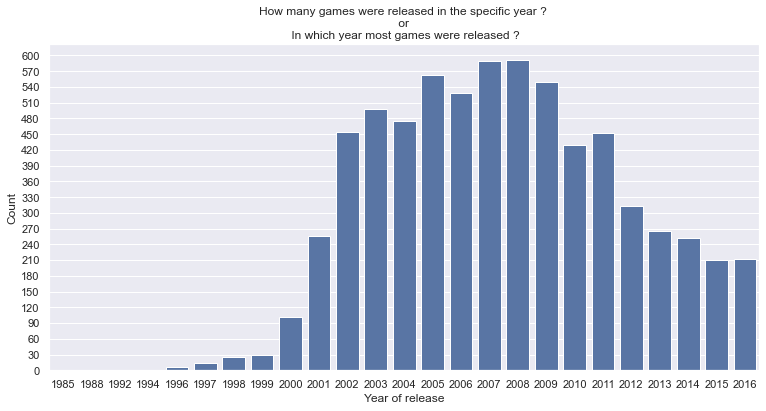

In [20]:
sns.set(style='darkgrid')
plt.figure(figsize=(28,6))
plt.subplot(1,2,1)
sns.countplot(data=game_sales,x='Year_of_Release',color=sns.color_palette()[0])
plt.title('How many games were released in the specific year ? \n or \n In which year most games were released ?')
plt.xlabel('Year of release');
plt.ylabel('Count')
plt.yticks(np.arange(0,600+30,30));

**INSIGHT-** As we can see the highest bar is above the year 2008, by which we can easily conclude that year 2008 was really a good year of all the gamers around the world. 2008 is in top with 592 games released defeating 2007 (by 2 more games) and 2005 (by 30 more games) and many others.

### 2. How many games were released for specific Platform ?

In [21]:
game_sales['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

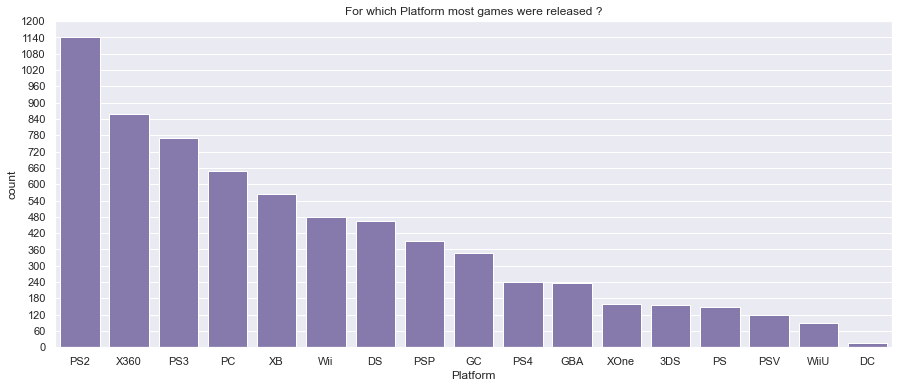

In [22]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.countplot(game_sales_sub['Platform'],color='m',order=game_sales_sub['Platform'].value_counts().index)
plt.title('For which Platform most games were released ?');
plt.yticks(np.arange(0,1200+60,60));

**INSIGHT-** We all know Playstation 2 ruled the childhood of all the kids and adults of 2000s and 90s respectively, The same way it is ruling the chart right now. Most of the titles were released for PS2, which are 1140. After PS2 there is a huge leap of 282 titles, which make the Xbox 360 'the second' with 868 titles.
Only 14 games were released for DC console which make it last in the league of consoles.
Since Our database is cropped after cleaning, the results may not actually match the google answers.

### 3. Which Video game genre is most Popular ?

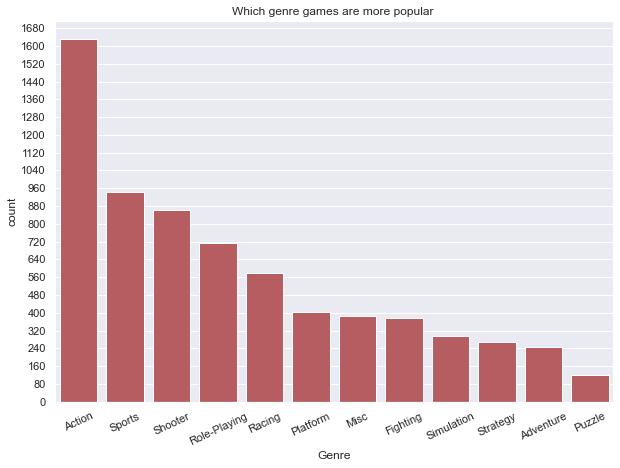

In [23]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.countplot(game_sales['Genre'],color='r',order=game_sales['Genre'].value_counts().index)
plt.xticks(rotation=25);
plt.title('Which genre games are more popular ');
plt.yticks(np.arange(0,1640+80,80));

**INSIGHT-** Who doesn't love action. Thats exactly what game publishers and developers thinks while creating a game and deciding its genre. Even I love every game of Action genre. We can even conclude in the bar plot plotted, that most of the games that were released were of Action genre. Only few like puzzles, that's why it is in the bottom of the order. Around 1630 games were of Action genre, and Sports were the second next favorite genre with around 943 games released for it.

### 4. How many games sold most units Globally ?

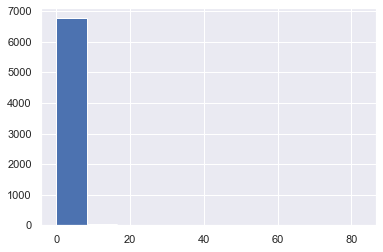

In [24]:
plt.hist(data=game_sales,x='Global_Sales');

As we can see the data above is centered towards the value from 0 to 10, which indicates that now it is time to apply log transformation.

In [25]:
game_sales['Global_Sales'].describe()

count    6825.000000
mean        0.777590
std         1.963443
min         0.010000
25%         0.110000
50%         0.290000
75%         0.750000
max        82.530000
Name: Global_Sales, dtype: float64

In [26]:
np.log10(game_sales['Global_Sales'].describe())

count    3.834103
mean    -0.109249
std      0.293018
min     -2.000000
25%     -0.958607
50%     -0.537602
75%     -0.124939
max      1.916612
Name: Global_Sales, dtype: float64

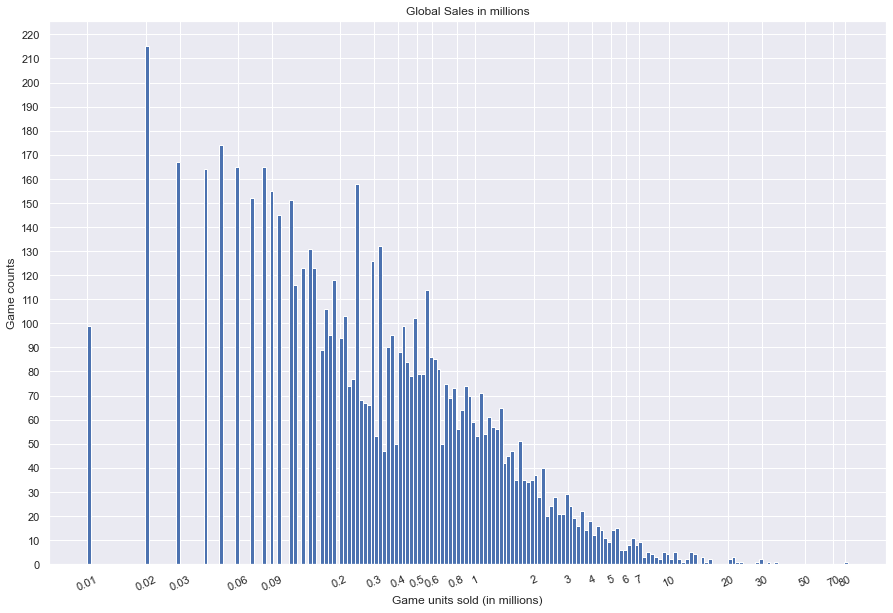

In [27]:
plt.figure(figsize=(15,10))
bins = 10**np.arange(-2.0,1.91+0.02,0.02);
ticks = [0.01,0.02,0.03,0.06,0.09,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,4,5,6,7,10,20,30,50,70,80];
labels = ['{}'.format(v) for v in ticks];
plt.hist(data=game_sales,x='Global_Sales',bins=bins);
plt.xscale('log');
plt.xticks(ticks,labels,rotation=25);
plt.yticks(np.arange(0,215+10,10))
plt.title('Global Sales in millions')
plt.xlabel('Game units sold (in millions)')
plt.ylabel('Game counts');

**INSIGHT-** There are 215 titles that were able to hit a mark of 20000 unit sold globally. However there is only 1 game that was most sold and which made up to 82530000 sales globally. You can also see a hike of bars in 0.2-0.3 million units, which also justifies that most of the games were being sold globally between 0.02 and 0.2-0.3 numbers.

### 5. How many games sold most units among different regions ?

I have described in the Preliminary Cleaning Section that why there was a need to Eliminate some of the regions value.

(array([5.541e+03, 4.300e+01, 8.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e-02, 1.066e+00, 2.122e+00, 3.178e+00, 4.234e+00, 5.290e+00,
        6.346e+00, 7.402e+00, 8.458e+00, 9.514e+00, 1.057e+01]),
 <a list of 10 Patch objects>)

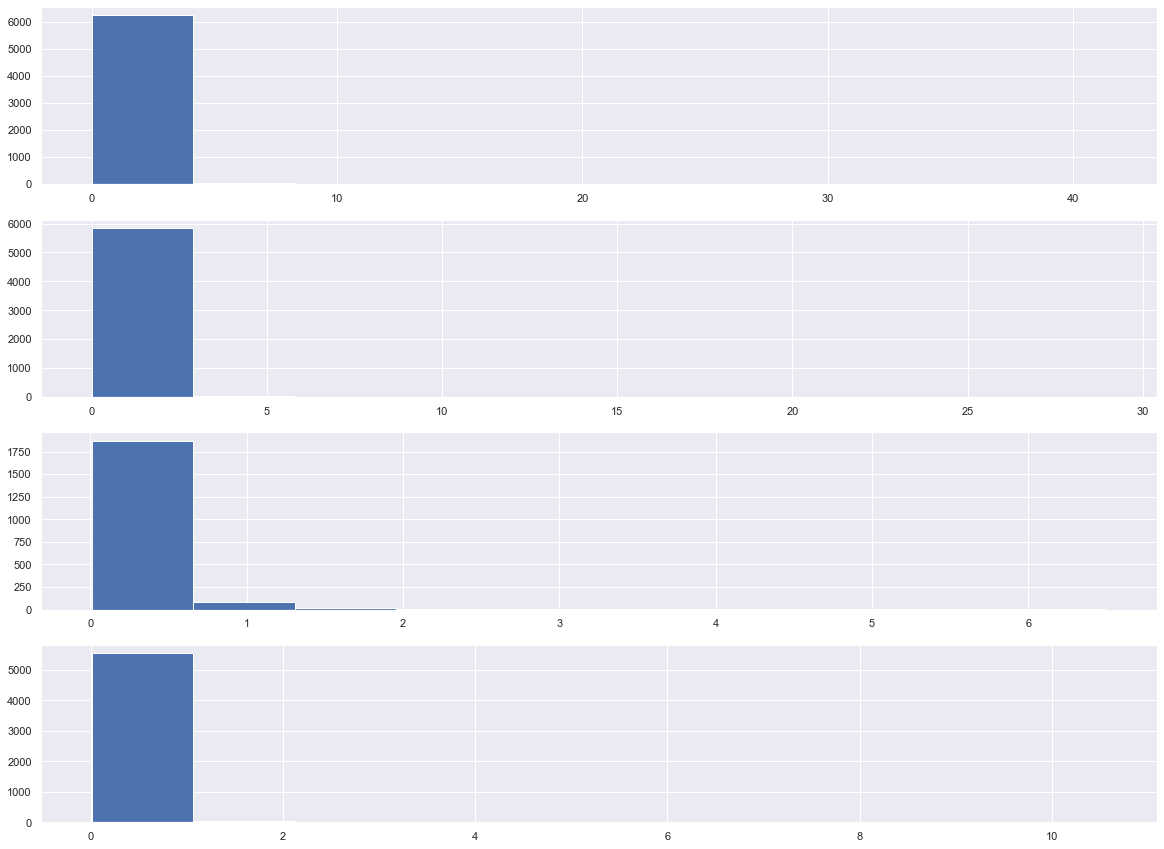

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.hist(data=game_sales_sub_2,x='NA_Sales')
plt.subplot(4,1,2)
plt.hist(data=game_sales_sub_3,x='EU_Sales')
plt.subplot(4,1,3)
plt.hist(data=game_sales_sub_4,x='JP_Sales')
plt.subplot(4,1,4)
plt.hist(data=game_sales_sub_5,x='Other_Sales')

This data also need some work to do regarding log transformation. Let's carve it in something beautiful and better understandable data.

<ipython-input-29-aedeb0f1dc8f>:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0.00,15)
<ipython-input-29-aedeb0f1dc8f>:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0.00,15)
<ipython-input-29-aedeb0f1dc8f>:43: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0.00,15)


Text(0, 0.5, 'Count')

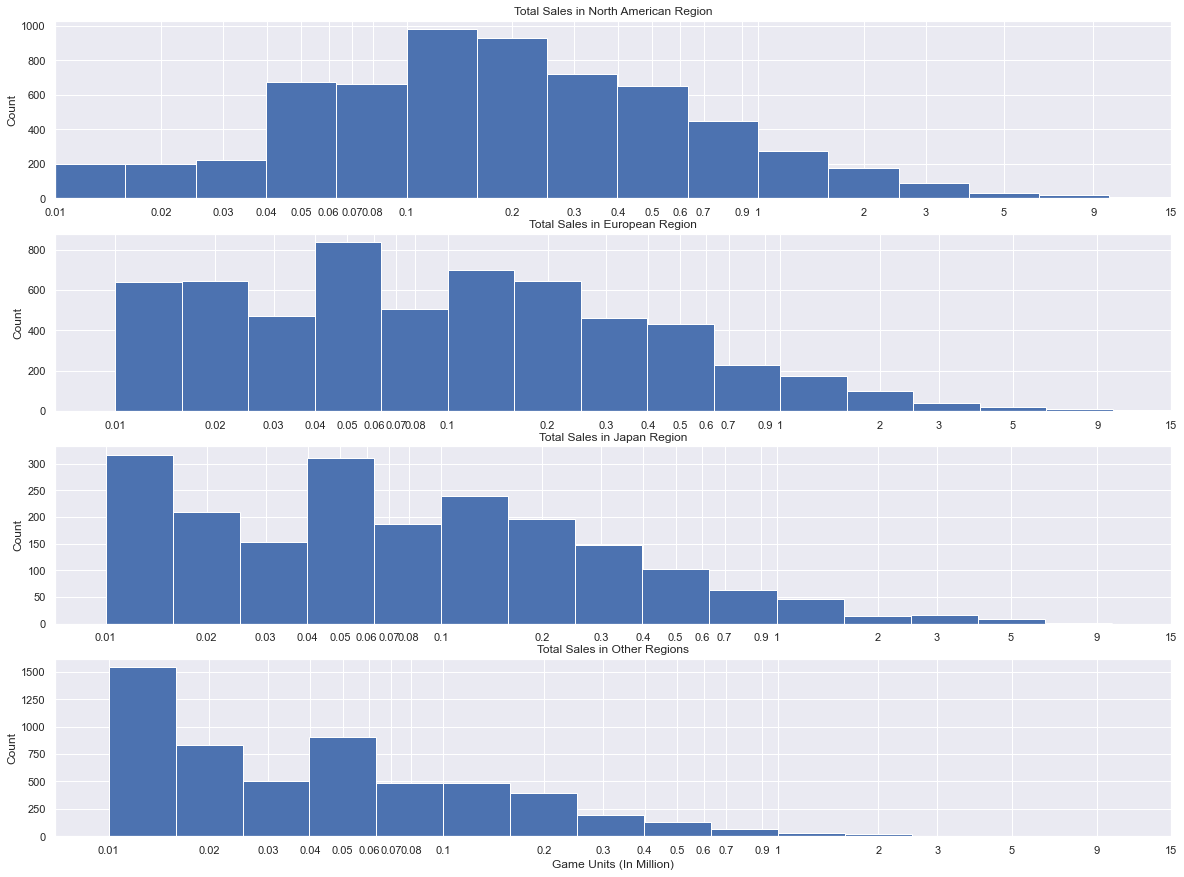

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
bins = 10**np.arange(-2.00,1.61+0.2,0.2)
ticks = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1,2,3,5,9,15];
labels = ['{}'.format(v) for v in ticks];
plt.hist(data=game_sales_sub_2,x='NA_Sales',bins=bins)
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlim(0.01,15)
plt.title('Total Sales in North American Region')
plt.ylabel('Count')

plt.subplot(4,1,2)
bins = 10**np.arange(-2.00,1.46+0.2,0.2)
ticks = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1,2,3,5,9,15];
labels = ['{}'.format(v) for v in ticks];
plt.hist(data=game_sales_sub_3,x='EU_Sales',bins=bins)
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlim(0.00,15)
plt.title('Total Sales in European Region')
plt.ylabel('Count')

plt.subplot(4,1,3)
bins = 10**np.arange(-2.00,0.81+0.2,0.2)
ticks = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1,2,3,5,9,15];
labels = ['{}'.format(v) for v in ticks];
plt.hist(data=game_sales_sub_4,x='JP_Sales',bins=bins)
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlim(0.00,15)
plt.title('Total Sales in Japan Region')
plt.ylabel('Count')


plt.subplot(4,1,4)
bins = 10**np.arange(-2.00,1.02+0.2,0.2)
ticks = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1,2,3,5,9,15];
labels = ['{}'.format(v) for v in ticks];
plt.hist(data=game_sales_sub_5,x='Other_Sales',bins=bins)
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlim(0.00,15)
plt.title('Total Sales in Other Regions')
plt.xlabel('Game Units (In Million)')
plt.ylabel('Count')

**INSIGHT-** After applying the log transformation data we can now finally understand the data properly. Talking about a single continent like NA,JP and EU, Most of the game titles were sold in North American Region alone. European region comes second, and Japan comes on third. The last one left is 'Other Region' Section which comprises of all the other places except these threes. There we can see that around 1541 titles were able to hit a mark of 1000 sales unit. With all that saying North America clearly wins the award for ' Region with most games Sold'.

### 6. Which game Rating is more Popular ?

In [30]:
# Rating_counts for all the ratings counts
rating_counts = game_sales['Rating'].value_counts()

# Rating order for showing all the rating in descending order
rating_order =rating_counts.index

In [31]:
# n_rating for total rating count combined.
n_rating = game_sales['Rating'].value_counts().sum()

# max_rating_count for the rating with most outcomes.
max_rating_count = rating_counts[0]

# max_prop means finding the percentage of most outcomed rating with total rating count
max_prop = max_rating_count / n_rating
print(max_prop)

0.34827838827838825


In [32]:
# Command for assigning the tick values according to the proportion
tick_props = np.arange(0, max_prop, 0.02)
print(tick_props)

# Command for Assigning the tick names for the tick values generated before
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_names)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34]
['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16', '0.18', '0.20', '0.22', '0.24', '0.26', '0.28', '0.30', '0.32', '0.34']


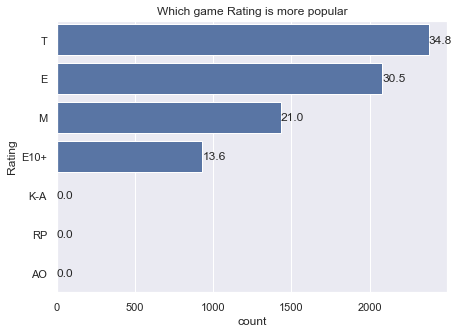

In [33]:
plt.figure(figsize=(7,5))
base_color = sns.color_palette()[0]
sns.set(style='darkgrid')
sns.countplot(data=game_sales, y='Rating', color=base_color, order=rating_order);

for i in range (rating_counts.shape[0]):
   
    count = rating_counts[i]
    pct_string = '{:0.1f}'.format(100*count/n_rating)
    plt.text(count+1, i, pct_string, va='center')
    plt.title('Which game Rating is more popular')

**INSIGHT-** For better understanding I plotted the percentage of specific Rating on that specific bar. As we can see that Games with Teen Rating (T) is more popular, with 34.8% of all the titles, Everyone(E) comes on second with 30.5% of all the titles, Mature (M) comes on third with 21% of all the titles, Everyone above 10 (E10+) comes on fourth with 13.6% of all the titles. Since Rating for RP,AO,and K-A are all 0.01 %, they appear too low or almost NULL.


### 7. Which Critic Score is most common ?

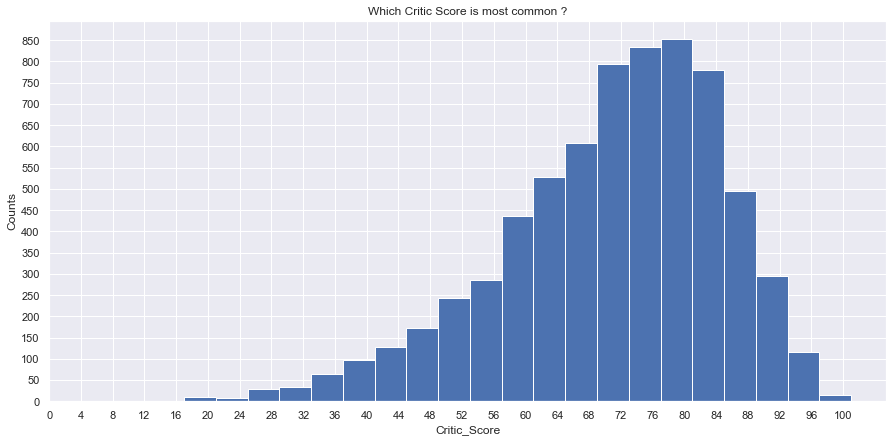

In [34]:
plt.figure(figsize=(15,7))
plt.hist(data=game_sales,x='Critic_Score',bins=np.arange(13,98+4,4))
ticks = np.arange(0,98+4,4)
labels = ['{}'.format(v) for v in ticks];
plt.xticks(ticks);
plt.yticks(np.arange(0,850+50,50));
plt.title('Which Critic Score is most common ?');
plt.xlabel('Critic_Score');
plt.ylabel('Counts');

**INSIGHT-** From seeing it's easily understandable that around 850 titles have critic Score between 76-80, which is the highest score amongst all. The most of the games have Critic Score between 68-84. Its actually kind of close to Normal Distribution. 

### 8. Top 10 Developers and Publishers.

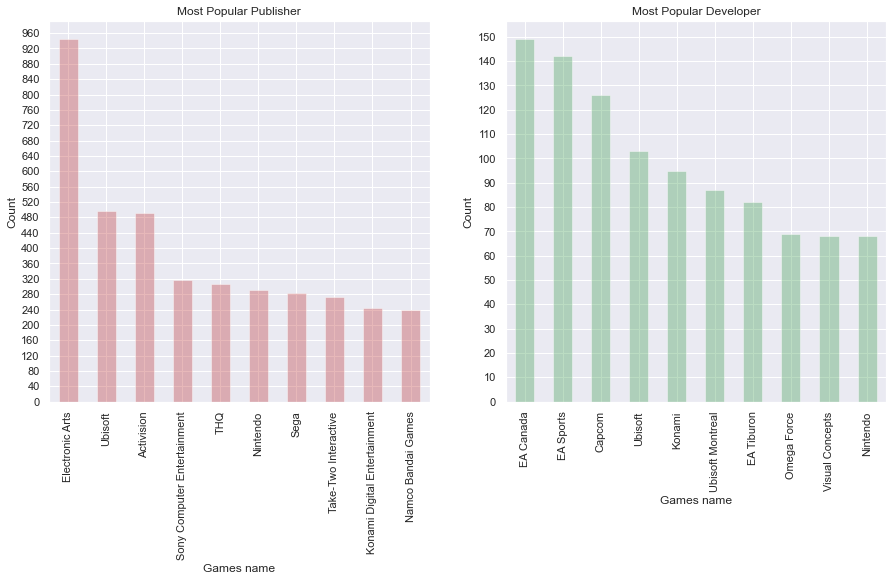

In [79]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
game_sales['Publisher'].value_counts()[:10].plot(kind='bar',alpha=0.4,color = 'r')
plt.title('Most Popular Publisher')
plt.xlabel('Games name')
plt.ylabel('Count')
plt.yticks(np.arange(0,944+40,40));

plt.subplot(1,2,2)
game_sales['Developer'].value_counts()[:10].plot(kind='bar',alpha=0.4,color = 'g')
plt.title('Most Popular Developer')
plt.xlabel('Games name')
plt.ylabel('Count')
plt.yticks(np.arange(0,150+10,10));

**INSIGHT-** The most Popular Publisher is Electronic Arts with 944 titles and the most Popular Developer is EA Canada with around 149 titles.

### 9. What is the impact of latest generations consoles on gaming titles ?

In [96]:
gen_order = ['PS','DC','GC','PS2','XB','PS3','Wii','X360','WiiU','PS4','XOne']

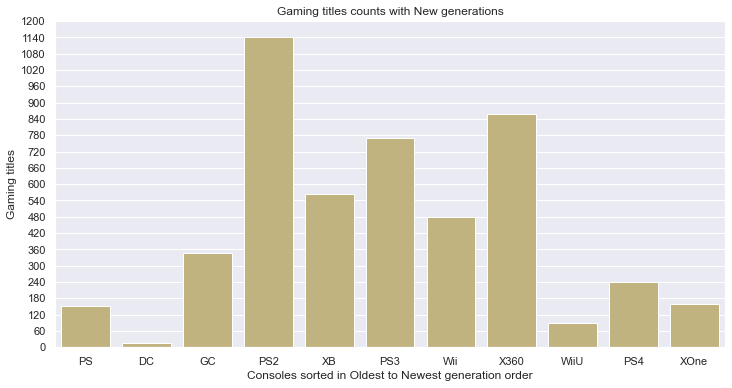

In [107]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.countplot(game_sales_sub_6['Platform'],color='y',order=gen_order)
plt.title('Gaming titles counts with New generations');
plt.xlabel('Consoles sorted in Oldest to Newest generation order')
plt.ylabel('Gaming titles')
plt.yticks(np.arange(0,1200+60,60));

**INSIGHT-** Gaming titles, for popularity factor, are dependant on gaming consoles Success. But We can't forget that with most successful gaming consoles generation change, the title counts are affected too. Playstation was first and major revolutionary console of fifth generation consoles, The titles are less due to the lack of technology at that time. DS,GC,PS2 and XB are consoles of sixth generation. Talking about popularity of consoles,PS2 was most sold consoles of sixth generation. Coming to the seventh generation with platforms as PS3,Wii and X360, titles started to decrease, cause with new gen hardware customers were demanding something more appealing to the eyes i.e. better graphics. Coming to the eighth generation platforms as WiiU,PS4 and XOne, titles started to decrease more. Cause the features like Triple AAA buffering and high shaders were making it difficult to release games within short span of time.

### Discussing the distributions of  variables of interest for any unusual points and for the need to perform any transformations.

> Yes, while calculating or I can say plotting of Global Sales, I realized that most of its data were driven towards the values of 0 to 10 million Sales. So I applied a log transformation to the data to make it look more appealing and Understanding. The data looked partially Bi-modal with one peak of 0.02 million and other between 0.2 and 0.3

### Of the features I investigated were there some unusual distributions? Did I performed any operations on the data to tidy, adjust, or change the form of the data? If so, why did I do this?

> 
1. First I removed all the null values from the database.
2. Then I changed the year data type from float to string, then I removed the .0 from their back to provide clear understanding.
3. Then I Removed all the sales variables with 0 values, to plot the log transformed graph.

# Bivariate Exploration

> In this section,we will investigate relationships between pairs of variables in our
data.

### 1. What are the Top 10 games in terms of Critic Score ?

###### (a) Top 10 games with best Critic Score.

In [35]:
group1 = game_sales.groupby('Name')['Critic_Score'].mean().sort_values(ascending=False)
group1

Name
SoulCalibur                98.0
Super Mario Galaxy         97.0
Super Mario Galaxy 2       97.0
Metroid Prime              97.0
NFL 2K1                    97.0
                           ... 
Rugby 15                   19.5
Balls of Fury              19.0
Anubis II                  19.0
Nickelodeon Party Blast    19.0
Ride to Hell               16.0
Name: Critic_Score, Length: 4377, dtype: float64

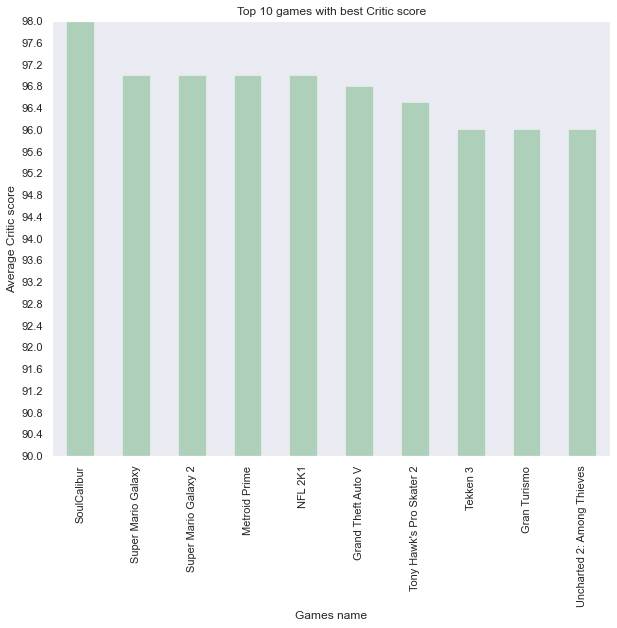

In [75]:
plt.figure(figsize=(10,8))
group1.iloc[:10].plot(kind='bar',color='g',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average Critic score')
plt.title('Top 10 games with best Critic score')
plt.yticks(np.arange(0,98+0.4,0.4))
plt.ylim(90,98.0)
plt.grid()
plt.show()

###### (b) Top 10 games with worst Critic Score.

In [5]:
group1 = game_sales.groupby('Name')['Critic_Score'].mean().sort_values(ascending=False)
group1

Name
SoulCalibur                     98.0
Super Mario Galaxy              97.0
NFL 2K1                         97.0
Metroid Prime                   97.0
Super Mario Galaxy 2            97.0
                                ... 
thinkSMART                       NaN
thinkSMART FAMILY!               NaN
thinkSMART: Chess for Kids       NaN
wwe Smackdown vs. Raw 2006       NaN
¡Shin Chan Flipa en colores!     NaN
Name: Critic_Score, Length: 11562, dtype: float64

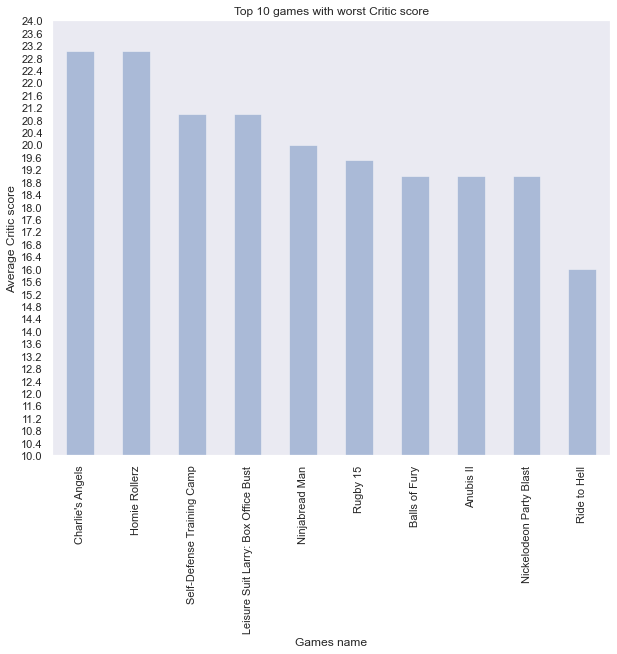

In [90]:
plt.figure(figsize=(10,8))
group1.iloc[-10:].plot(kind='bar',color='b',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average Critic score')
plt.title('Top 10 games with worst Critic score')
plt.yticks(np.arange(0,25+0.4,0.4))
plt.ylim(10,24.0)
plt.grid()
plt.show()

###### (c) Both as Subplots

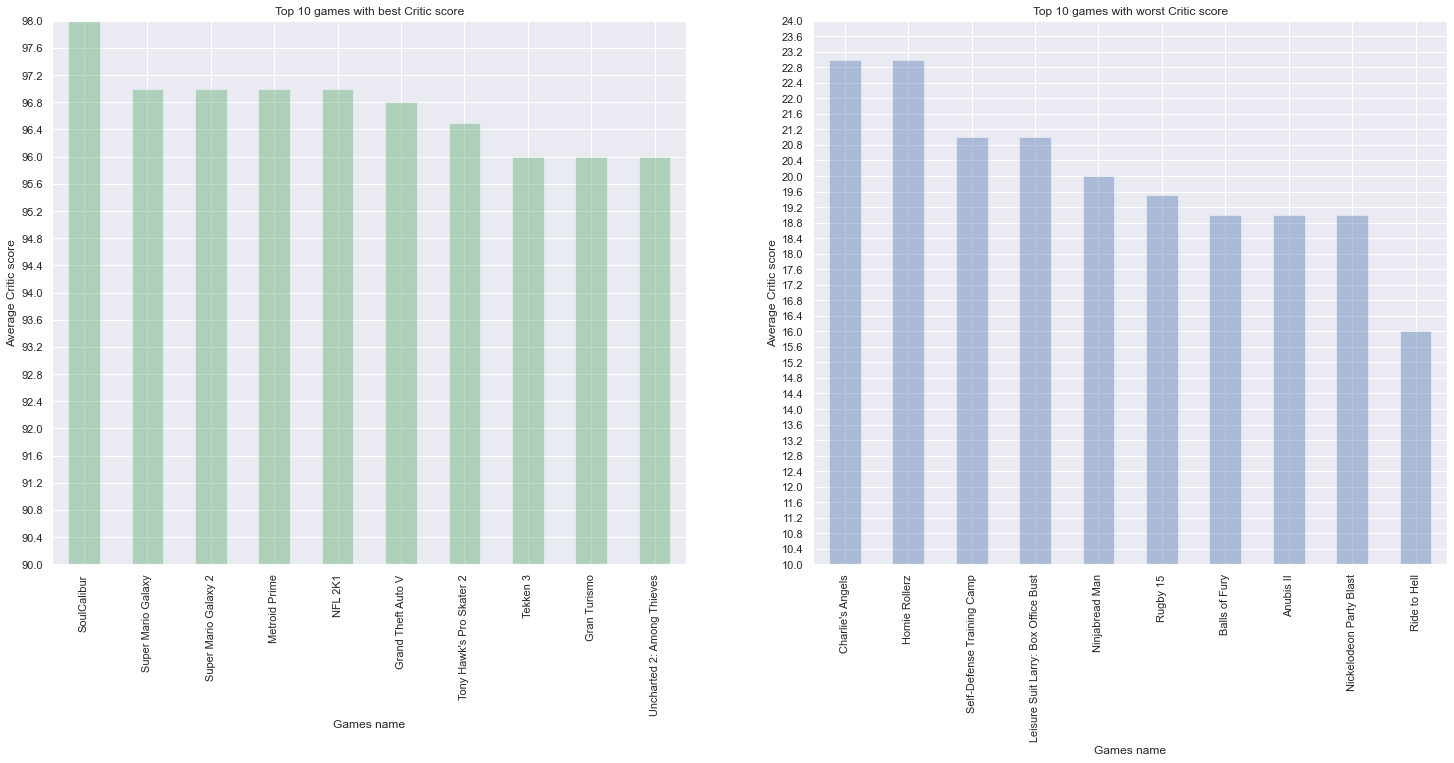

In [193]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
group1.iloc[:10].plot(kind='bar',color='g',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average Critic score')
plt.title('Top 10 games with best Critic score')
plt.yticks(np.arange(0,98+0.4,0.4))
plt.ylim(90,98.0);

plt.subplot(1,2,2)
group1.iloc[-10:].plot(kind='bar',color='b',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average Critic score')
plt.title('Top 10 games with worst Critic score')
plt.yticks(np.arange(0,25+0.4,0.4))
plt.ylim(10,24.0);


**INSIGHT-** I grouped the games in terms of Average Critics Score. Since there are 6825 titles in the whole dataset, It is quite difficult to Plot each one of them.
> For games with best critic Score:-
I filtered only first Ten games instead of whole list. Also I trimmed the Y axis from 90 to 98.0, to help audience to grab little differences quite well. The Only reason for doing this was, that there were all the games in top 10 list whose critic score were above 90. As we can See here, 'Soul Calibur' is the game with Best Critic Score, A score of 98. 'Uncharted 2' comes on 10th Position with Critic Score of 96. Technically Saying,'Super Mario Galaxy', 'Super Mario Galaxy 2', 'Metroid Prime' and 'NFL2K1' they all are on second position with same Critic Score of 97.<br> 
<br> 
> For games with worst critic Score:-
I also filtered only last Ten games instead of whole list. Also I trimmed Y axis from 10 to 24,cause last 10 of the games were between these. 'Ride to Hell' is the game least Scored with a Critic Score of 16 out of 100. 'Charlie's Angels' comes on 10th last with a Critic Score of 23.

### 2. What are the Top 10 games in terms of User Score ?

###### (a) Top 10 games with best User Score.

In [38]:
group2 = game_sales.groupby('Name')['User_Score'].mean().sort_values(ascending=False)
group2

Name
Boktai: The Sun is in Your Hand          96.0
Harvest Moon: Friends of Mineral Town    96.0
Wade Hixton's Counter Punch              95.0
Karnaaj Rally                            95.0
MLB SlugFest Loaded                      95.0
                                         ... 
Power Gig: Rise of the SixString         13.0
Ride to Hell                             11.5
Family Party: 30 Great Games             10.0
Dragon Ball: Evolution                    9.0
Pool Party                                7.0
Name: User_Score, Length: 4377, dtype: float64

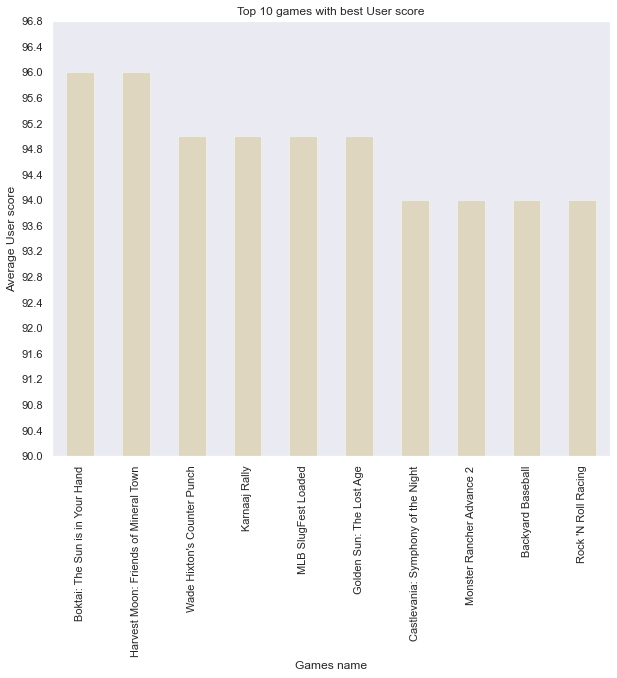

In [39]:
plt.figure(figsize=(10,8))
group2.iloc[:10].plot(kind='bar',color='y',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average User score')
plt.title('Top 10 games with best User score')
plt.yticks(np.arange(0,98+0.4,0.4))
plt.ylim(90,96.8)
plt.grid()
plt.show()

###### (b) Top 10 games with worst User Score.

In [41]:
group2 = game_sales.groupby('Name')['User_Score'].mean().sort_values(ascending=False)
group2

Name
Boktai: The Sun is in Your Hand          96.0
Harvest Moon: Friends of Mineral Town    96.0
Wade Hixton's Counter Punch              95.0
Karnaaj Rally                            95.0
MLB SlugFest Loaded                      95.0
                                         ... 
Power Gig: Rise of the SixString         13.0
Ride to Hell                             11.5
Family Party: 30 Great Games             10.0
Dragon Ball: Evolution                    9.0
Pool Party                                7.0
Name: User_Score, Length: 4377, dtype: float64

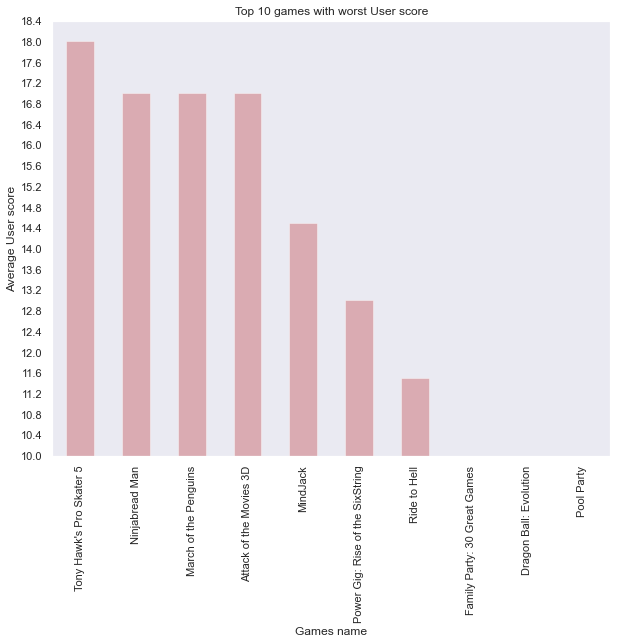

In [40]:
plt.figure(figsize=(10,8))
group2.iloc[-10:].plot(kind='bar',color='r',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average User score')
plt.title('Top 10 games with worst User score')
plt.yticks(np.arange(0,25+0.4,0.4))
plt.ylim(10,18.4)
plt.grid()
plt.show()

###### (c) Both as Subplots.

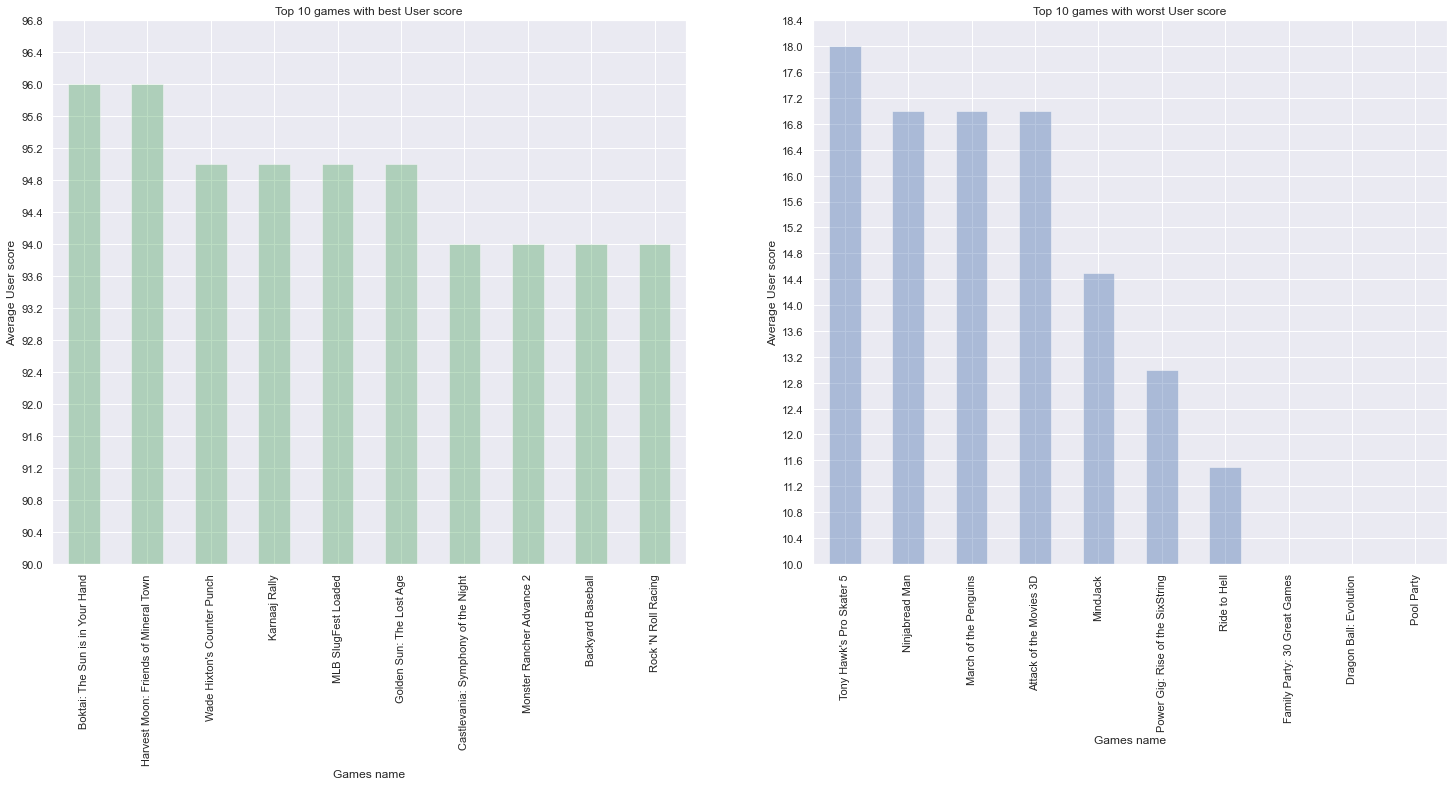

In [192]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
group2.iloc[:10].plot(kind='bar',color='g',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average User score')
plt.title('Top 10 games with best User score')
plt.yticks(np.arange(0,98+0.4,0.4))
plt.ylim(90,96.8);

plt.subplot(1,2,2)
group2.iloc[-10:].plot(kind='bar',color='b',alpha=0.4)
plt.xlabel('Games name')
plt.ylabel('Average User score')
plt.title('Top 10 games with worst User score')
plt.yticks(np.arange(0,25+0.4,0.4))
plt.ylim(10,18.4);

**INSIGHT-** I grouped the games in terms of Average User Score. Since there are 6825 titles in the whole dataset, It is quite difficult to Plot each one of them.
> For games with best User Score:-
I filtered only first Ten games instead of whole list. Also I trimmed the Y axis from 90 to 98.0, to help audience to grab little differences quite well. The Only reason for doing this was, that there were all the games in top 10 list whose User score were above 90. As we can See here, 'Boktai: The Sun is in Your Hand' is the game with Best User Score,a score of 96. 'Rock N' Roll Racing' comes on 10th Position with Critic Score of 94. Technically Saying, 'Boktai: The Sun is in Your Hand' and 'Harvest Moon: Friends of Mineral Town' are on 1st Position, where 'Wade Hixton's Counter Punch' ,'Karnaaj Rally', 'MLB SlugFest Loaded' and 'Golden Sun: The Lost Age' are on 2nd Position where 'Castlevania: Symphony of the Night','Monster Rancher Advance 2','Backyard Baseball' and 'Rock 'N Roll Racing'are on 3rd Positon, all with the ratings of 96,95,94 for Position 1st,2nd and 3rd Respectively. <br> 
<br> 
> For games with worst User Score:-
I also filtered only last Ten games instead of whole list. Also I trimmed Y axis from 10 to 18.4,cause last 10 of the games were between these. 'Pool Party' is the game least Scored with a Critic Score of 7 out of 100. 'Tony Hawk's Pro Skater 5 ' comes on 10th last with a User Score of 18. Funny Thing is 'Ride to Hell' the only game which is least scored by User and MetaCritics as well.  


### 3. What is the Impact of Critic Score and User Score on Global Sales of video game Units?

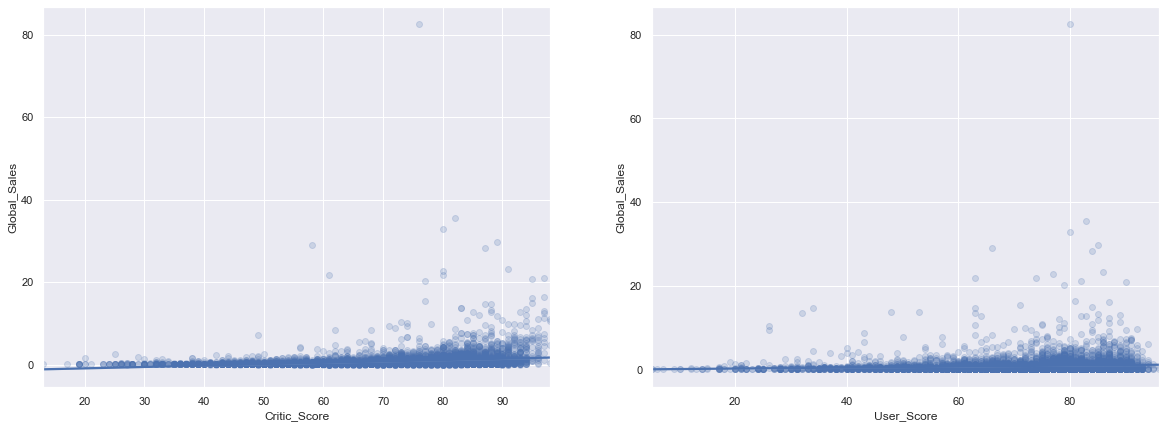

In [48]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.regplot(game_sales['Critic_Score'], game_sales['Global_Sales'],scatter_kws={'alpha':0.2})
plt.subplot(1,2,2)
sns.regplot(game_sales['User_Score'], game_sales['Global_Sales'],scatter_kws={'alpha':0.2})


I subplotted both of the scatter plots to compare both at once, But somehow it looks like that they both are inclined towards the bottom. The only outlier which is above 80 is showing the figure this way. Due to which there is a need to log tranform the Global Sales axis.

###### (a) What is the Impact of Critic Score on Global Sales of video game Units?

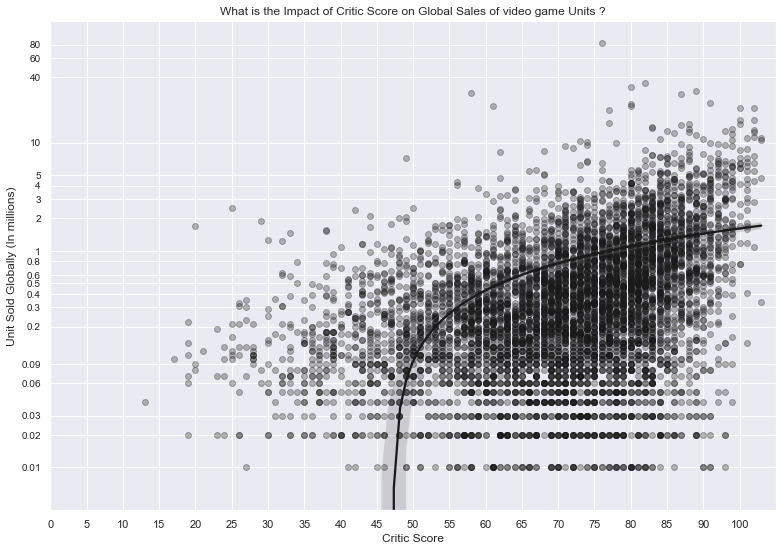

In [85]:
plt.figure(figsize=(13,9))

sns.regplot(game_sales['Critic_Score'],game_sales['Global_Sales'],scatter_kws={'alpha':0.3},color='k')
plt.xlabel('Critic Score')
plt.yscale('log')
plt.yticks([0.01,0.02,0.03,0.06,0.09,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,4,5,10,40,60,80], ['0.01','0.02','0.03','0.06','0.09','0.2','0.3','0.4','0.5','0.6','0.8','1','2','3','4','5','10','40','60','80'],fontsize=10)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.ylabel('Unit Sold Globally (In millions)')
plt.title('What is the Impact of Critic Score on Global Sales of video game Units ?');

###### (b) What is the Impact of User Score on Global Sales of video game Units?

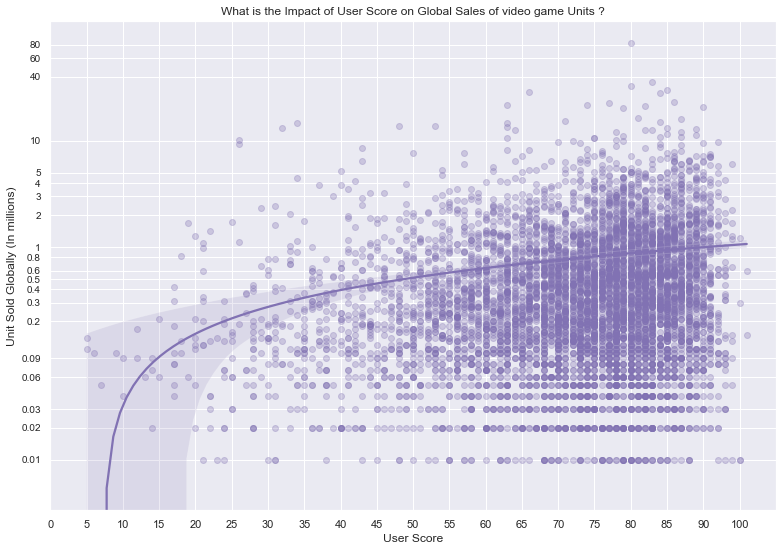

In [84]:
plt.figure(figsize=(13,9))
sns.regplot(game_sales['User_Score'],game_sales['Global_Sales'],scatter_kws={'alpha':0.3},color='m')
plt.xlabel('User Score')
plt.yscale('log')
plt.yticks([0.01,0.02,0.03,0.06,0.09,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,4,5,10,40,60,80], ['0.01','0.02','0.03','0.06','0.09','0.2','0.3','0.4','0.5','0.6','0.8','1','2','3','4','5','10','40','60','80'],fontsize=10)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.ylabel('Unit Sold Globally (In millions)');
plt.title('What is the Impact of User Score on Global Sales of video game Units ?');

###### (c) Both as Subplots.

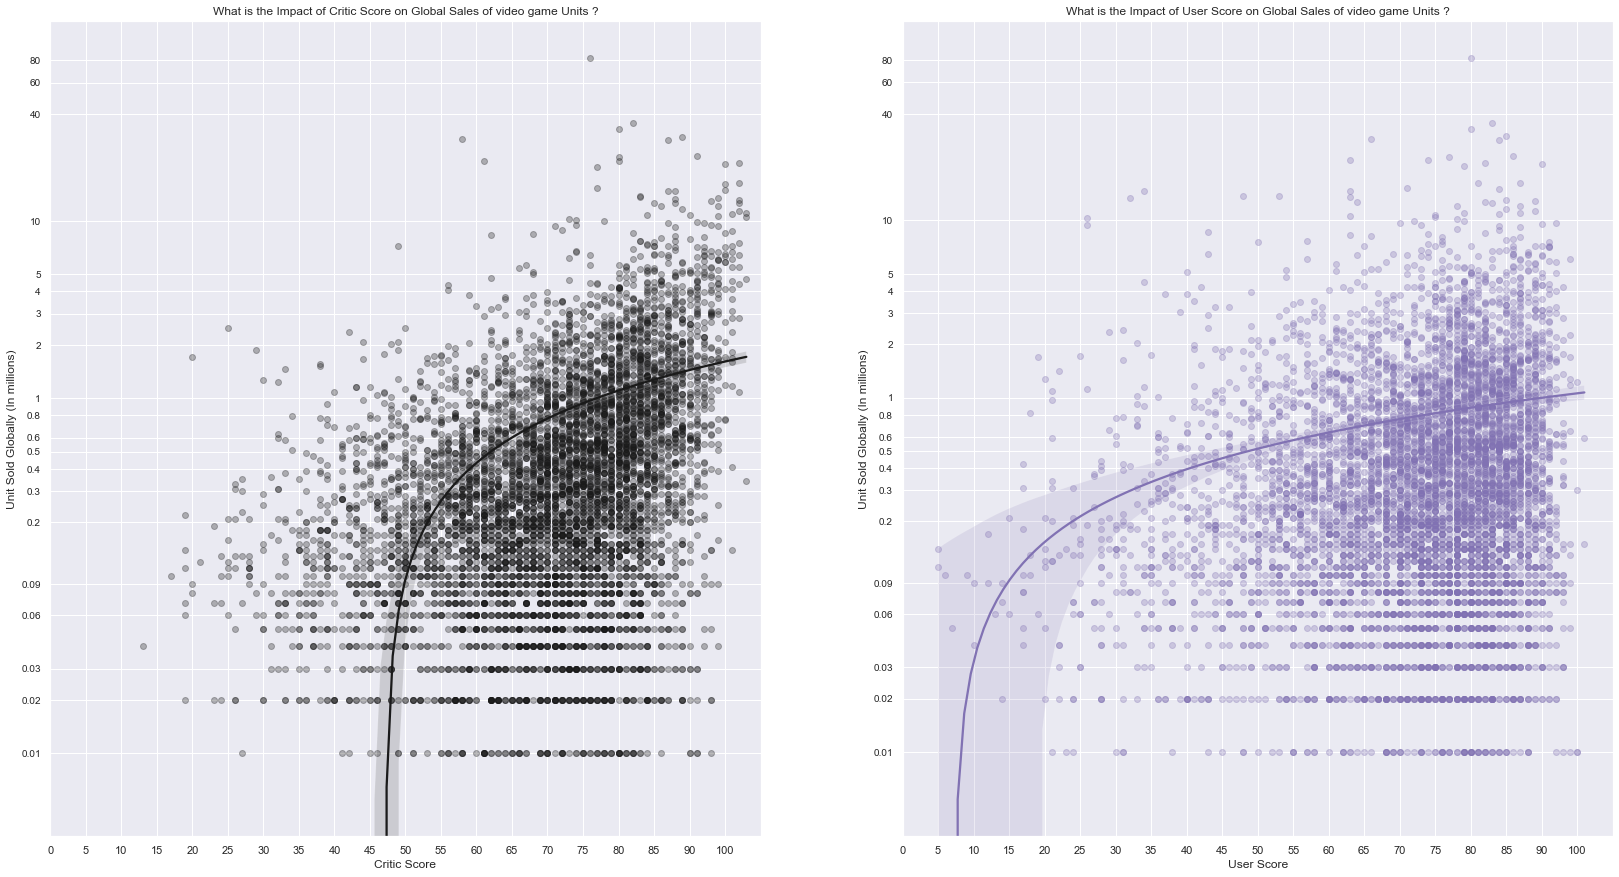

In [80]:
plt.figure(figsize=(28,15))
plt.subplot(1,2,1)
sns.regplot(game_sales['Critic_Score'],game_sales['Global_Sales'],scatter_kws={'alpha':0.3},color='k')
plt.xlabel('Critic Score')
plt.yscale('log')
plt.yticks([0.01,0.02,0.03,0.06,0.09,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,4,5,10,40,60,80], ['0.01','0.02','0.03','0.06','0.09','0.2','0.3','0.4','0.5','0.6','0.8','1','2','3','4','5','10','40','60','80'],fontsize=10)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.ylabel('Unit Sold Globally (In millions)')
plt.title('What is the Impact of Critic Score on Global Sales of video game Units ?');

plt.subplot(1,2,2)
sns.regplot(game_sales['User_Score'],game_sales['Global_Sales'],scatter_kws={'alpha':0.3},color='m')
plt.xlabel('User Score')
plt.yscale('log')
plt.yticks([0.01,0.02,0.03,0.06,0.09,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,4,5,10,40,60,80], ['0.01','0.02','0.03','0.06','0.09','0.2','0.3','0.4','0.5','0.6','0.8','1','2','3','4','5','10','40','60','80'],fontsize=10)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.ylabel('Unit Sold Globally (In millions)');
plt.title('What is the Impact of User Score on Global Sales of video game Units ?');

**INSIGHT-** As you can see, there was a need to transform the Global Sales axis with log trans. After doing so its looks pretty clean. The regression line is having a bent in both cases due to the log scale applied on Y axis. But we can see there is positive Co-relation between Critic Score:Global Sales and User Score:Global Sales. Though the relation is not strong enough, but still it clarifies that more the Critic Score or User Score of the game is, the more it is capable of selling units globally. I applied transparency parameter to see the overlapping of points at certain areas. The regression plot is more darker around 50-90 Critic Score & User Score for both the Cases, which defines that most of the games were having Score between these twos. The Critic Score regression Line is more rising with a better angle from 0.2 than User Score, which makes it a stronger relative than User Score. The intercept in both the cases is on X axis and it is starting after some points. The points from it starts indicates that relation is acually working from those points.

### 3. Does more Score counter means more Score ?

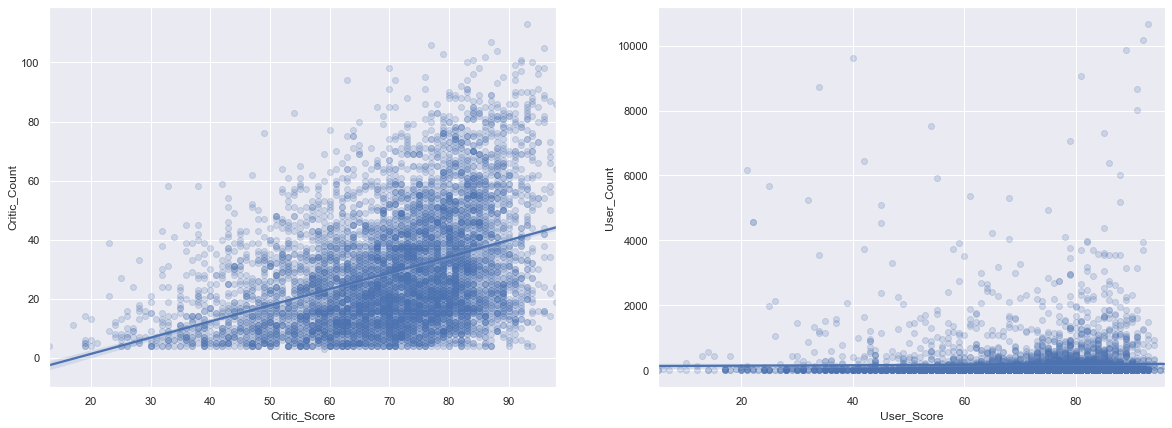

In [68]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.regplot(game_sales['Critic_Score'], game_sales['Critic_Count'],scatter_kws={'alpha':0.2})
plt.subplot(1,2,2)
sns.regplot(game_sales['User_Score'], game_sales['User_Count'],scatter_kws={'alpha':0.2})


From the relation between Critc Score and Critic Counts, it is pretty Clear that they have a positive relation, but for the User Score and User counts relation we can't say the same, Cause its difficult to interpret the results. Are you thinking the same, that I am ? It's time again to apply some mighty logs.

###### (a) Impact of Critic Counts on Critic Score

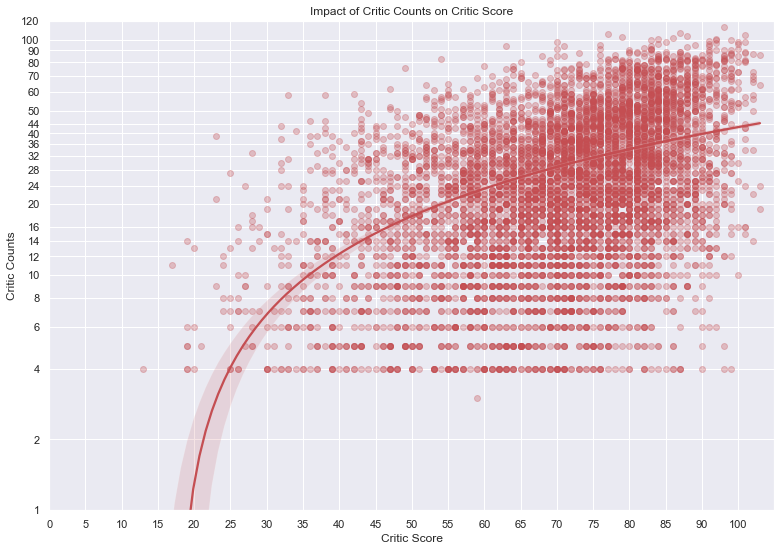

In [83]:
plt.figure(figsize = [13,9])
sns.regplot(data = game_sales, x = 'Critic_Score', y = 'Critic_Count', scatter_kws={'alpha':0.3},color='r')
plt.xlabel('Critic Score')
plt.yscale('log')
plt.yticks([1,2,4,6,8,10,12,14,16,20,24,28,32,36,40,44,50,60,70,80,90,100,120],['1','2','4','6','8','10','12','14','16','20','24','28','32','36','40','44','50','60','70','80','90','100','120'])
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.ylim(1,120)
plt.title('Impact of Critic Counts on Critic Score')
plt.ylabel('Critic Counts')
plt.show()

###### (b) Impact of User Counts on User Score

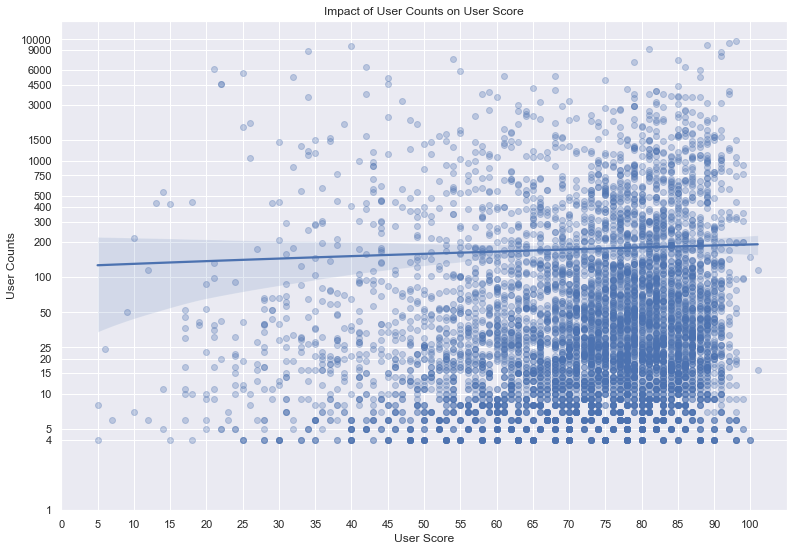

In [82]:
plt.figure(figsize = [13,9])
sns.regplot(data = game_sales, x = 'User_Score', y = 'User_Count', scatter_kws={'alpha':0.3},color='b')
plt.xlabel('User Score')
plt.yscale('log')
plt.yticks([1,4,5,10,15,20,25,50,100,200,300,400,500,750,1000,1500,3000,4500,6000,9000,11000],['1','4','5','10','15','20','25','50','100','200','300','400','500','750','1000','1500','3000','4500','6000','9000','10000','11000'])
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.title('Impact of User Counts on User Score')
plt.ylabel('User Counts')
plt.show()

###### (c) Both as Subplots.

Text(0, 0.5, 'User Counts')

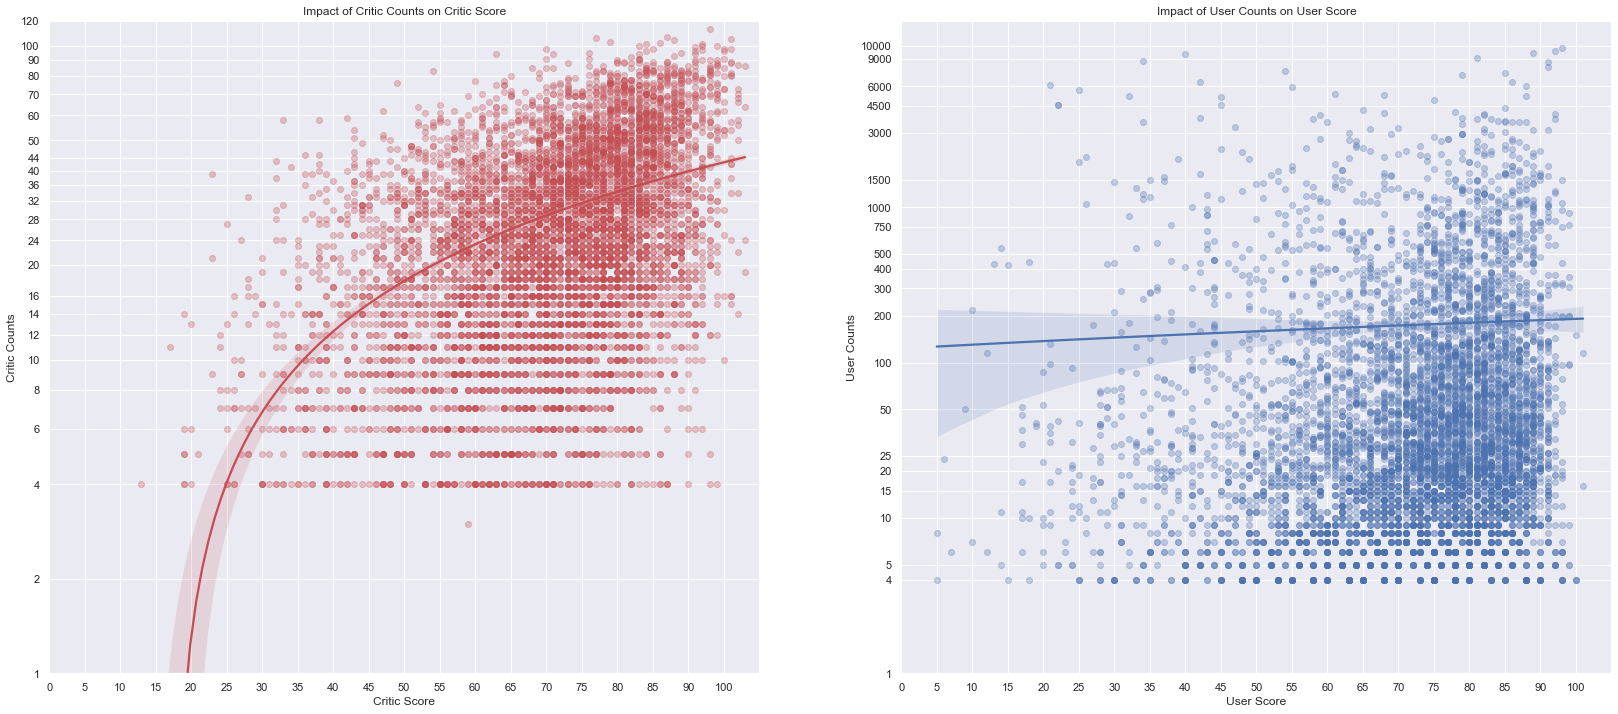

In [81]:
plt.figure(figsize = [28,12])
plt.subplot(1,2,1)
sns.regplot(data = game_sales, x = 'Critic_Score', y = 'Critic_Count', scatter_kws={'alpha':0.3},color='r')
plt.xlabel('Critic Score')
plt.yscale('log')
plt.yticks([1,2,4,6,8,10,12,14,16,20,24,28,32,36,40,44,50,60,70,80,90,100,120],['1','2','4','6','8','10','12','14','16','20','24','28','32','36','40','44','50','60','70','80','90','100','120'])
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.ylim(1,120)
plt.title('Impact of Critic Counts on Critic Score')
plt.ylabel('Critic Counts')

plt.subplot(1,2,2)
sns.regplot(data = game_sales, x = 'User_Score', y = 'User_Count', scatter_kws={'alpha':0.3},color='b')
plt.xlabel('User Score')
plt.yscale('log')
plt.yticks([1,4,5,10,15,20,25,50,100,200,300,400,500,750,1000,1500,3000,4500,6000,9000,11000],['1','4','5','10','15','20','25','50','100','200','300','400','500','750','1000','1500','3000','4500','6000','9000','10000','11000'])
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','100'])
plt.title('Impact of User Counts on User Score')
plt.ylabel('User Counts')


**INSIGHT-** Critic Score and counts relation was already clear,but we needed to work on User score relation with their counts.The work is now done.<br>
<br>
**(1) Impact of Critic Counts on Critic Score-** The relation here is quite transparent to see. More the Critic Counts, better the Critic Score is. However it raises the question that what if games with low Critic Score were reviewed by more Crtitic. How would have they scored then? The relation starts from the Critic Score of 20 and it is all positive.<br>
<br>
**(2) Impact of User Counts on User Score-** The relation here is Stable. Although there is a very little rise from approx 130 to 200 Critic Counts, but all rounder the relation is not negative nor positive. There is no impact of User counts on User Score. Even with the high counts of User Counts like 6000, User score is still between 20 and 25. That is the correct way of rating games.

### 4.  Which rating metric is more popular for a specific genre game ?

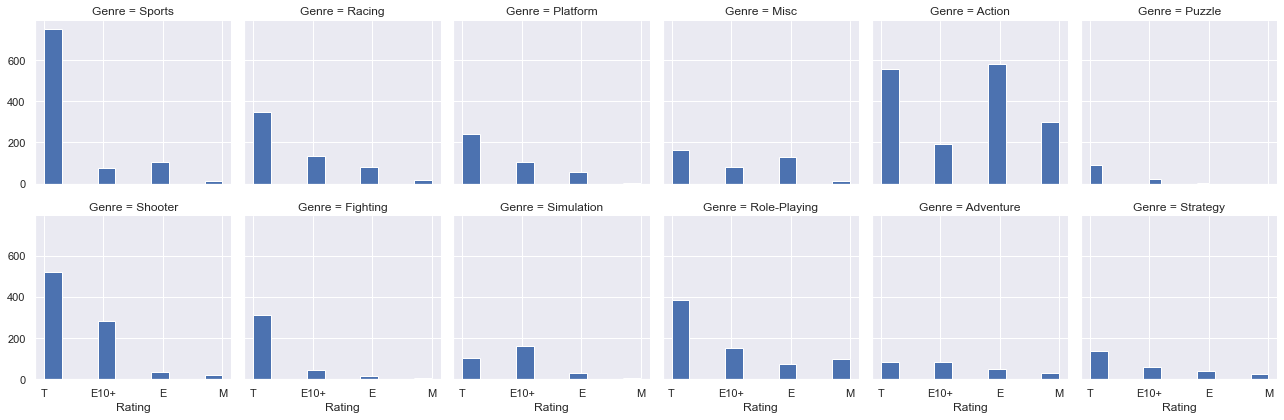

In [87]:
g = sns.FacetGrid(data=game_sales_sub,col='Genre',col_wrap=6);
g.map(plt.hist,'Rating');

**INSIGHT-** The action genre is the only genre having all the rating titles with some good proportions, whereas the strategy genre is the only genre with least proportion of all the ratings. Only Action games has most mature rated titles,cause Action is boring without little blood. Sports genre is the genre with most titles rated T. Puzzle has only 2 ratings, Teen and E10+. Shooter is the only genre with most titles rated E10+.

### 5. Which rating metric is more popular for a specific Platform ?

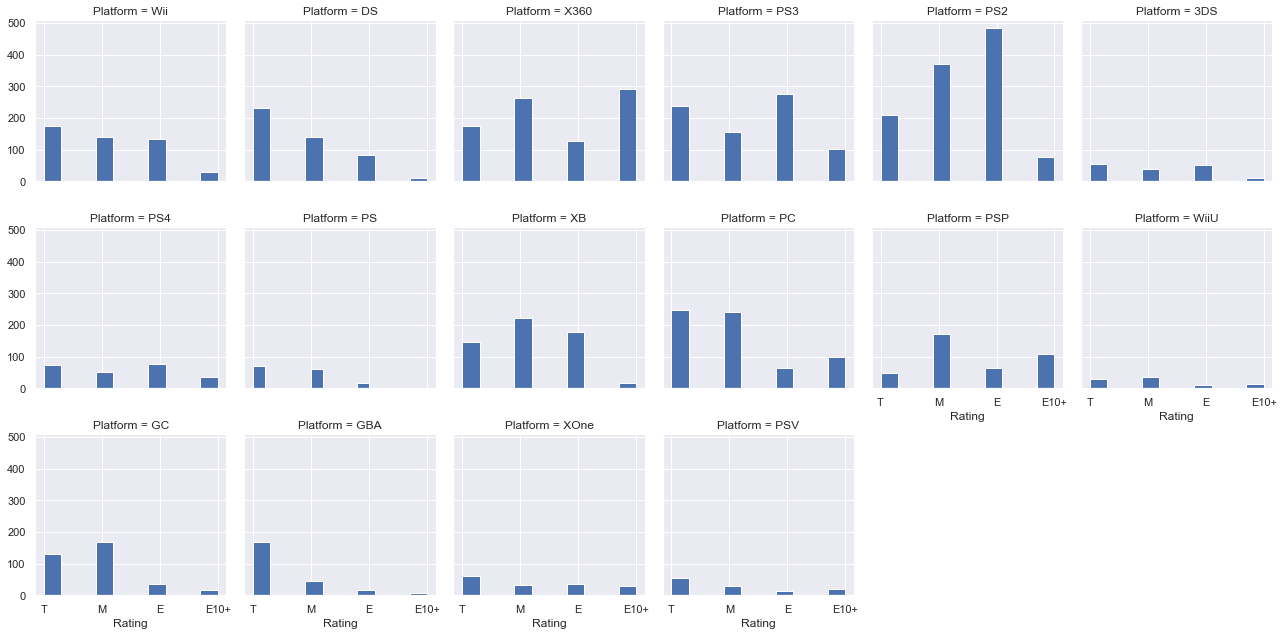

In [108]:
g = sns.FacetGrid(data=game_sales_sub_1,col='Platform',col_wrap=6);
g.map(plt.hist,'Rating');

**INSIGHT-** Playstaion 2 was the platform with most 'M' and 'E' rated gaming titles. WiiU has overall least proportion of gaming titles, that's why every rating is lowest amongst all. More informative analysis can be performed on the basis of this facet graph. 

### 6. Which of the Rating metric is critically acclaimed ?

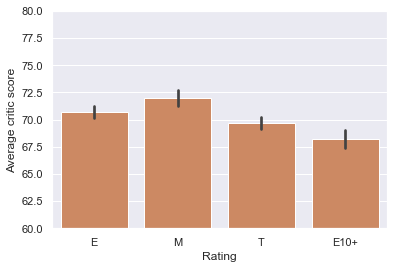

In [194]:
sns.barplot(data=game_sales_sub,x='Rating',y='Critic_Score',color = sns.color_palette()[1]);
plt.ylim(60,80);
plt.ylabel('Average critic score');

**INSIGHT-** Amongst all other metrics, Mature Rated titles have more Critic Score. With the Analysis, The conclusion is that mature rated titles recieve around an average Critic Score of 71.96. 'E' Rating comes on second with average Critic Score of 70.67 and 'T' comes on third with an average Critic Score of 69.67. 'E10+' Rating comes last with an average Critic Score of 68.22.

### 7. Which is the effect of Rating on Global Sales ?

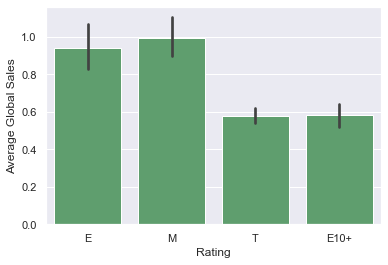

In [196]:
sns.barplot(data=game_sales_sub,x='Rating',y='Global_Sales',color = sns.color_palette()[2]);
plt.ylabel('Average Global Sales');

**INSIGHT-** It was shown previously that Critic Score and Global Sales has positive Relation. The same relational effect can be seen here. In terms of Critic Score, M rating was on top. Same thing is going on here i.e. M Rated titles are sold most with 994,962 copies, beating 'E' to the second with 941,162 copies, beating 'E10+' to third with 581,237 copies and 'T' to last with 579,436 copies sold worldwide.

### 8. Which Platform titles were most sold Globally ?


In [118]:
game_sales_sub.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)

Platform
Wii     1.375741
PS      1.373356
PS3     1.019896
PS4     1.016862
X360    0.994522
PS2     0.829798
DS      0.823987
XOne    0.814906
3DS     0.795032
WiiU    0.742472
GBA     0.555907
PSP     0.481846
GC      0.458103
XB      0.372553
DC      0.325000
PC      0.287831
PSV     0.261695
Name: Global_Sales, dtype: float64

In [119]:
game_sale_order = game_sales_sub.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False).index

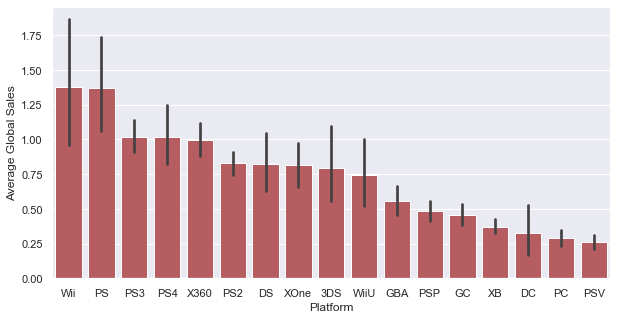

In [198]:
plt.figure(figsize=(10,5))
sns.barplot(data=game_sales_sub,x='Platform',y='Global_Sales',order=game_sale_order,color = sns.color_palette()[3])
plt.ylabel('Average Global Sales');

**INSIGHT-** Wii is the console with around 1,375,741 copies sold globally of their released titles. Playstation comes on second with around 1,373,356 copies sold globally of their released titles. Playstaion Vita comes on last with only 2,61,695 copies sold globally of their released titles.

### 9. Top 10 Publishers, whose games were sold most globally ?

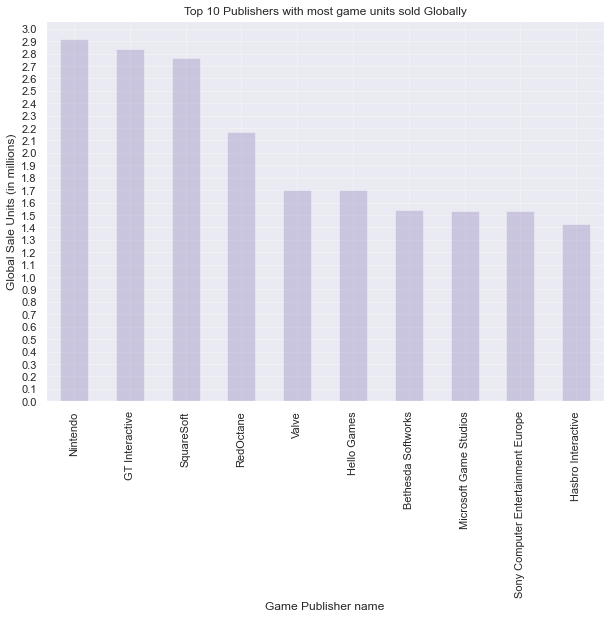

In [121]:
Publisher_grp = game_sales_sub.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).iloc[:10]
plt.figure(figsize=(10,7))
Publisher_grp.plot(kind='bar',color='m',alpha=0.3)
plt.title('Top 10 Publishers with most game units sold Globally')
plt.xlabel('Game Publisher name')
plt.ylabel('Global Sale Units (in millions)')
plt.yticks(np.arange(0,3.0+0.1,0.1));
plt.grid(alpha=0.3)

**INSIGHT-** Nintendo is the publisher which tops the best publisher chart with 2,919,210 copies sold globally of their published games. Rest of the data is highly informative. 

### 10. Top 10 Developers, whose games were sold most globally ?

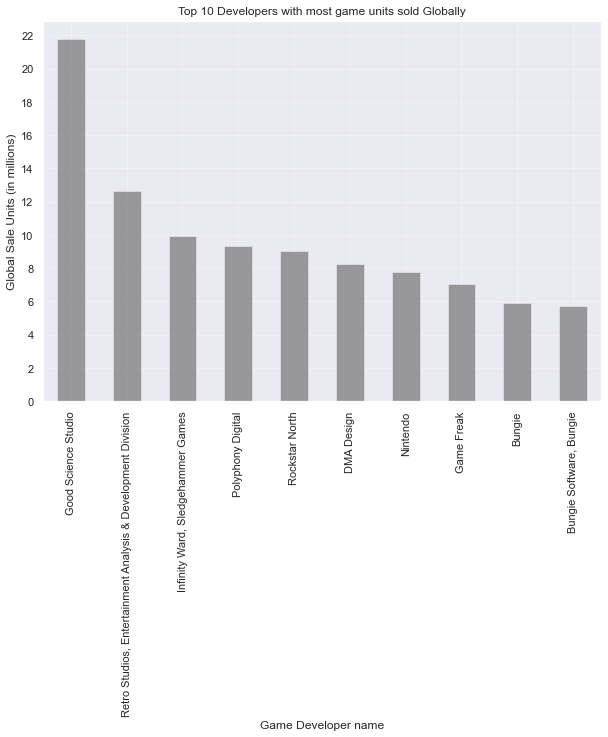

In [123]:
Developer_grp = game_sales_sub.groupby('Developer')['Global_Sales'].mean().sort_values(ascending=False).iloc[:10]
plt.figure(figsize=(10,7))
Developer_grp.plot(kind='bar',color='k',alpha=0.4)
plt.title('Top 10 Developers with most game units sold Globally')
plt.xlabel('Game Developer name')
plt.ylabel('Global Sale Units (in millions)')
plt.yticks(np.arange(0,22+2,2));
plt.grid(alpha=0.3)

**INSIGHT-** Good Science Studios is the Studio and developer company which come on first with around 21,810,000 copies sold of the games they developed.

### Talking about some of the relationships I observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

1. More the Critic count,better the Critic Score is. <br>
2. User Score has no impact over User Counts.<br>
3. Better the User Score and Critic Score is, better will be the sales globally.
4. Mature Rated games are most sold and critically acclaimed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The gaming titles were gradually decreasing with new generations of consoles. The game titles were all less for handhelds. 

## Multivariate Exploration

> Creating plots of three or more variables to investigate the data even
further.

### 1. Does relation between Critic Score and Critic counts is affected by Year of Release?

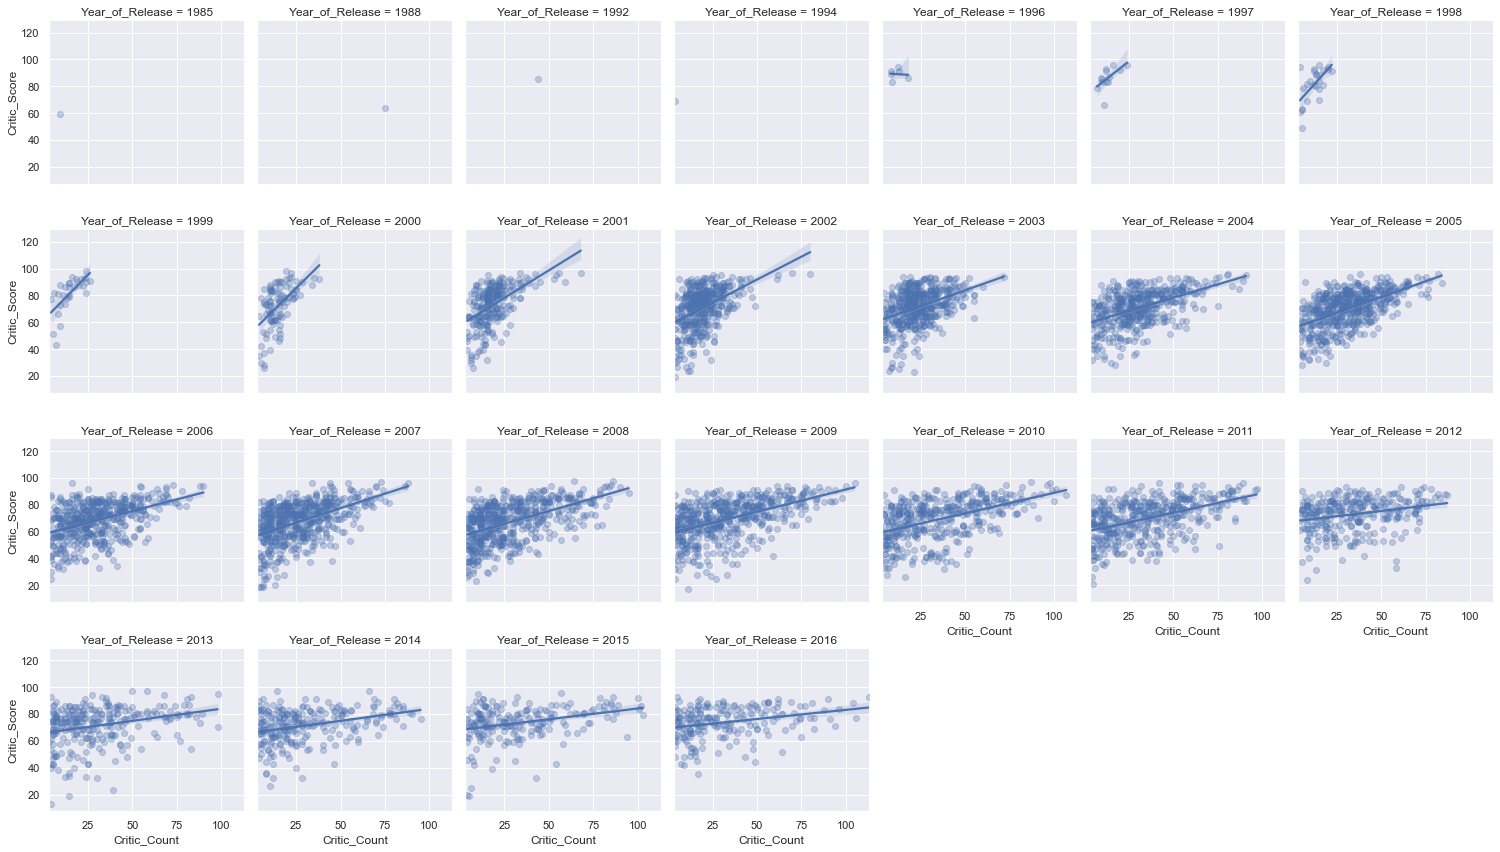

In [126]:
g = sns.FacetGrid(data=game_sales_sub,col='Year_of_Release',margin_titles=True,col_wrap=7)
g.map(sns.regplot,'Critic_Count','Critic_Score',scatter_kws={'alpha':0.3})

**INSIGHT-** The relation between Critic Score and Critic Counts is overall positive as shown previously. But as we progress through the year of release titles we can actually see the regression line going down angular. The curve is most rising with the games released in 1998 and after that, on an average, the regression line keeps on falling downwards. At the year 2016 we can almost see stable relation between both. Maybe we can say that people actually scored games on their quality, rather than their popularity. Scatter plots with year of release before 2000 are less denser due to the lesser titles released at that time. This plot actually assissted us in witnessing the big picture rather than just simply saying that, 'more the critic count, more the Critic score'.


### 2. Which Rating is more popular with global sales across different years of release?

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


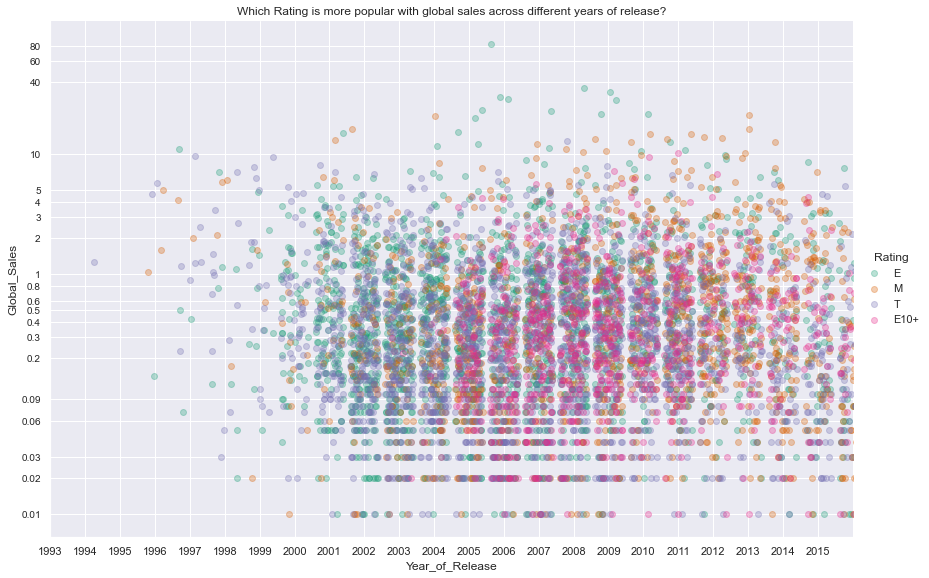

In [161]:
g = sns.FacetGrid(data=game_sales_sub,hue='Rating',size=8,aspect=1.5,palette='Dark2')
g.map(sns.regplot,'Year_of_Release','Global_Sales',fit_reg=False,x_jitter=0.4,scatter_kws={'alpha':0.3})
plt.yscale('log')
plt.yticks([0.01,0.02,0.03,0.06,0.09,0.2,0.3,0.4,0.5,0.6,0.8,1,2,3,4,5,10,40,60,80], ['0.01','0.02','0.03','0.06','0.09','0.2','0.3','0.4','0.5','0.6','0.8','1','2','3','4','5','10','40','60','80'],fontsize=10)
plt.xticks(np.arange(game_sales_sub['Year_of_Release'].min(),game_sales_sub['Year_of_Release'].max()))
plt.xlim(1993,2016)
plt.title('Which Rating is more popular with global sales across different years of release?')
g.add_legend()

**INSIGHT-** 60000 to 300000 copies of E10+ rated games titles were sold between the year 2004-2012. Titles rated E were sold most from 2000 to 2003.By seeing the overall distribution, we can evaluate that E10+ rating is most spreaded. Mature rated titles were sold equally over the span of release, but the distribution becomes thicker after 2006 year, as the titles rated M were began to release more.

### 3. Which Platform released title Ratings were scored best ?

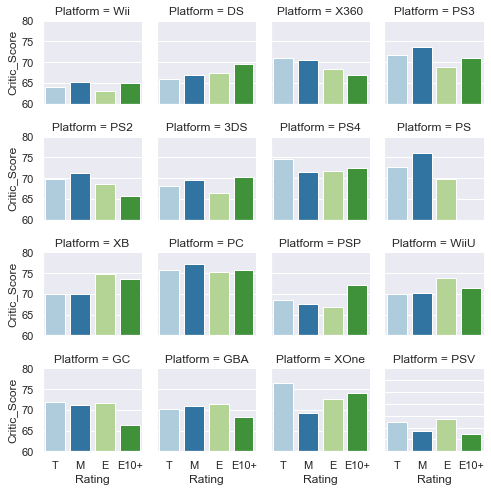

In [181]:
g = sns.FacetGrid(data=game_sales_sub_1,col='Platform',col_wrap=4,size=1.75);
g.map(sns.barplot,'Rating','Critic_Score',ci=None,palette='Paired')
plt.ylim(60,80);
plt.yticks(np.arange(60,game_sales_sub['Critic_Score'].max(),5));


**INSIGHT-** PC is master here again. Every titles rating were most rated for PC platform. The reason behind this that almost every game released for console after 2000 was available for PC, except some exclusive titles. But we also can't neglect that PC has some exclusive titles too. Let's talk about other consoles apart from PC. In terms of 'T' Rating, Xbox One has most titles scored best by Critics, while Wii has titles scored least. In terms of 'M' Rating, Play Station has most titles scored best by Critics, while PSV has titles scored least. In terms of 'E' Rating, Play Station has most titles scored best by Critics, while Wii has titles scored least. In terms of 'E10+' Rating, X Box has most titles scored best by Critics, while Playstation has titles scored least. 

### 4. Which genre Rating is scored best ?

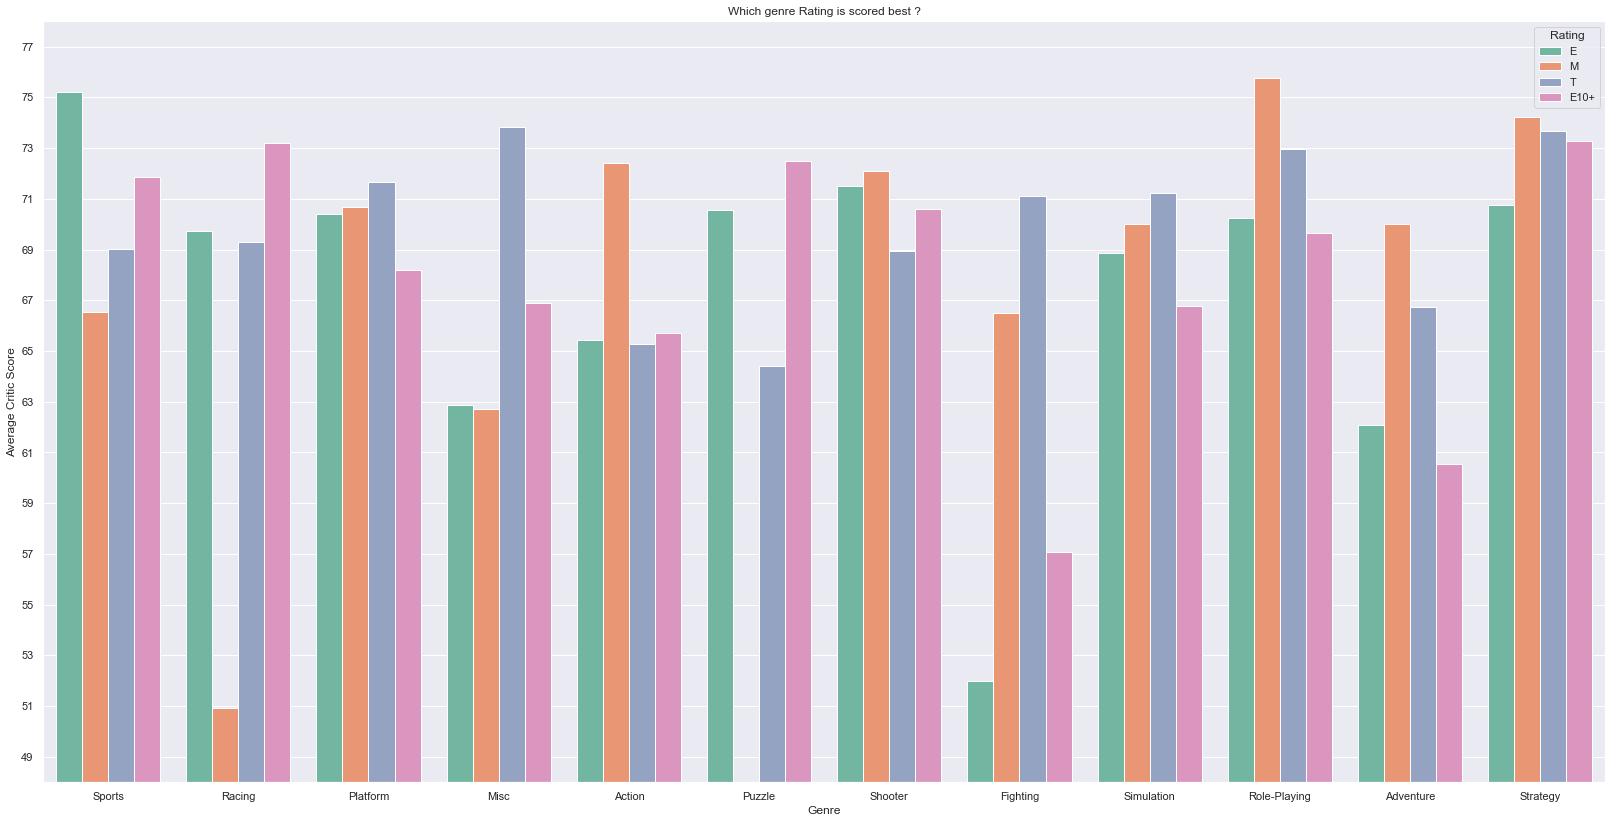

In [203]:
plt.figure(figsize=(28,14))
sns.set(style='darkgrid')
sns.barplot(data=game_sales_sub,x='Genre',y='Critic_Score',hue='Rating',palette='Set2',dodge=0.4,ci=None)
plt.yticks(np.arange(game_sales_sub['Critic_Score'].min(),game_sales_sub['Critic_Score'].max(),2));
plt.ylim(48,78);
plt.title('Which genre Rating is scored best ?');
plt.ylabel('Average Critic Score');

**INSIGHT-** The best scored titles are titles with Role-Playing genre and Rated M. The second best scored titles are titles with Sports genre and Rated E. For 'T' Rating, games with Misc genre are scored best. For 'E10+' Rating, games with Strategy genre are scored best. <br>
<br>
Let's talk about the lower score models:-<br>
Games with Racing genre and mature Rating are scored least, Games with Fighting genre and E Rating are scored second least. Games with Adventure genre and mature Rating are scored third least. Games with Misc genre and M Rating are scored fourth  least. For the Conclusion Mature Rating only suits to Role Playing and Action genre.

### Talking about some of the relationships I observed in this part of the investigation.

> I expanded my research for relation of Critic Scores, Critic Counts and Global Sales with other categorical variables like Platform, Rating and year of release. Here are some of the insights. <br>
1. The relation between Critic Score and Critic Count decreases and gets weaker with new releases over the year.
2. E10+ Rated titles are most popular in terms of Global Sales and Critic Score.
3. PC has the titles with better proportion of Rating than any other Platform.
4. Mature Rating is only suited best for Role playing and Action genre games.
